<a href="https://colab.research.google.com/github/amf599-cyber/N-Body_Test/blob/main/Test-Data-Analysis-v1-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/particle_accelerations_test.csv')
# display(df.head())

In [2]:
import numpy as np

# Calculate 'separation distance'
df['separation distance'] = np.sqrt(df['d_x']**2 + df['d_y']**2 + df['d_z']**2)

# Calculate 'absolute magnitude of acceleration'
df['absolute magnitude of acceleration'] = np.sqrt(df['a_x']**2 + df['a_y']**2 + df['a_z']**2)

# display(df.head())

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


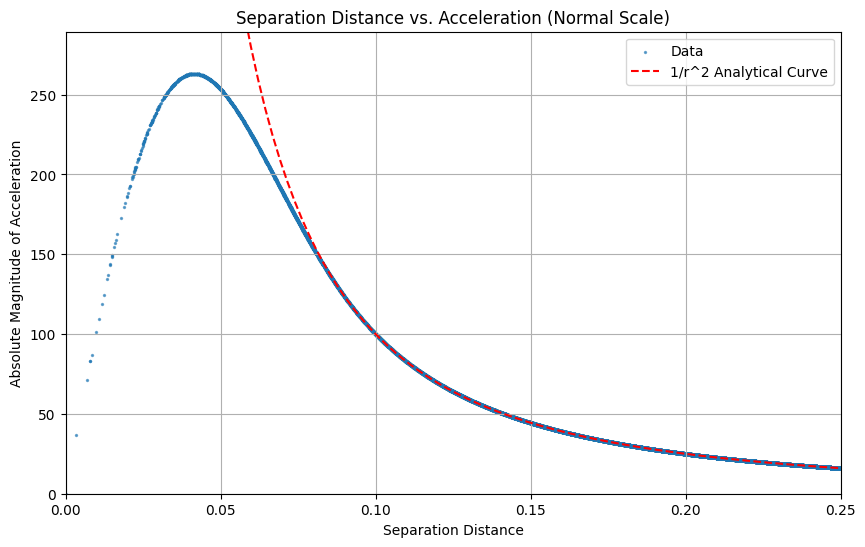

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(df['separation distance'], df['absolute magnitude of acceleration'], alpha=0.6, s=2, label='Data')

# Add analytical curve (1/r^2)
C = 1.0 # Adjusted C value
r_analytical = np.linspace(df['separation distance'][df['separation distance'] > 0].min(), df['separation distance'].max(), 500)
accel_analytical = C / (r_analytical**2)
plt.plot(r_analytical, accel_analytical, color='red', linestyle='--', label='1/r^2 Analytical Curve')

plt.xlabel('Separation Distance')
plt.ylabel('Absolute Magnitude of Acceleration')
plt.title('Separation Distance vs. Acceleration (Normal Scale)')
plt.grid(True)
plt.legend()

# Set y-limits to highlight scatter data
y_min = df['absolute magnitude of acceleration'].min() * 0.9
y_max = df['absolute magnitude of acceleration'].max() * 1.1
plt.ylim(y_min, y_max)

x_min = 0
x_max = 0.25
plt.xlim(x_min, x_max)

plt.show()

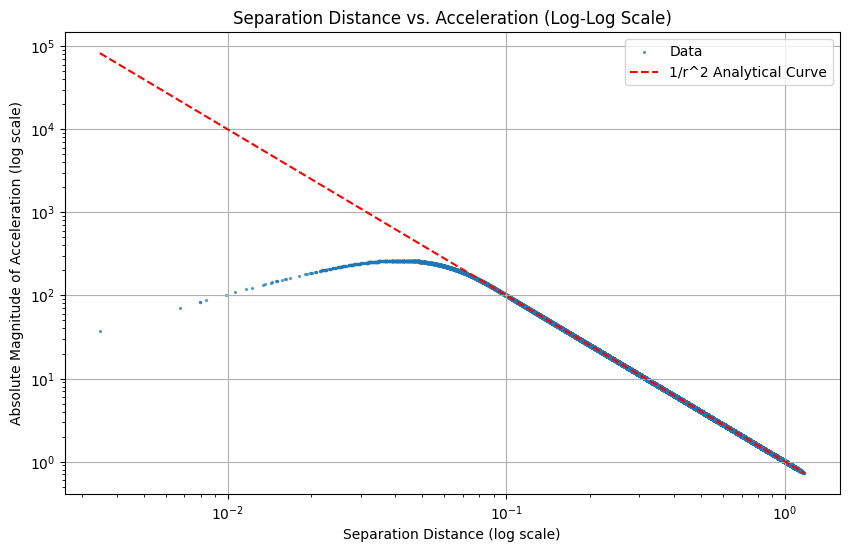

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(df['separation distance'], df['absolute magnitude of acceleration'], alpha=0.6, s=2, label='Data')

# Add analytical curve (1/r^2)
C = 1.0 # Adjusted C value
r_analytical = np.logspace(np.log10(df['separation distance'][df['separation distance'] > 0].min()), np.log10(df['separation distance'].max()), 500)
accel_analytical = C / (r_analytical**2)
plt.plot(r_analytical, accel_analytical, color='red', linestyle='--', label='1/r^2 Analytical Curve')

plt.xlabel('Separation Distance (log scale)')
plt.ylabel('Absolute Magnitude of Acceleration (log scale)')
plt.title('Separation Distance vs. Acceleration (Log-Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

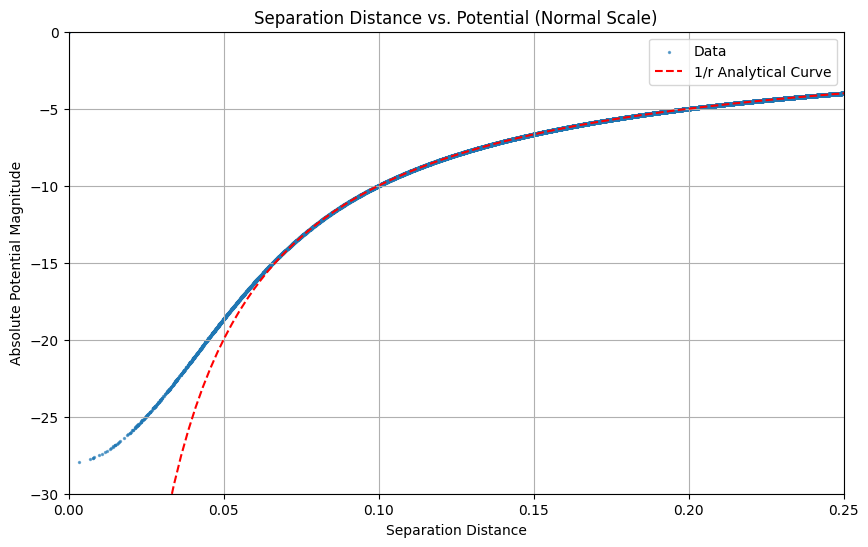

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(df['separation distance'], -np.abs(df['pot']), alpha=0.6, s=2, label='Data')

# Add analytical curve (1/r)
C = 1.0 # Adjusted C value
r_analytical = np.linspace(df['separation distance'][df['separation distance'] > 0].min(), df['separation distance'].max(), 500)
potential_analytical = C / r_analytical
plt.plot(r_analytical, -potential_analytical, color='red', linestyle='--', label='1/r Analytical Curve')

plt.xlabel('Separation Distance')
plt.ylabel('Absolute Potential Magnitude')
plt.title('Separation Distance vs. Potential (Normal Scale)')
plt.grid(True)
plt.legend()

# Set y-limits to highlight scatter data
y_min = -30
y_max = 0
plt.ylim(y_min, y_max)

x_min = 0
x_max = 0.25
plt.xlim(x_min, x_max)

plt.show()

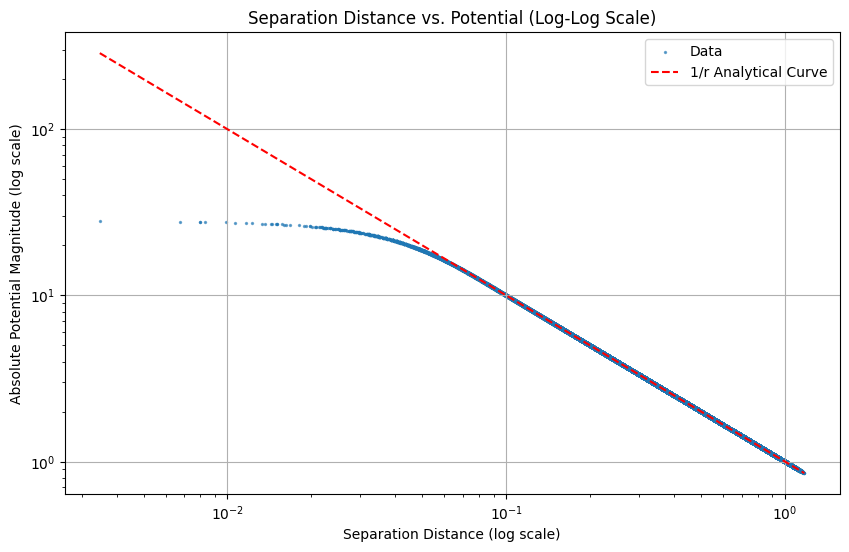

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
# Using absolute value for potential magnitude and filtering out zeros for log scale
potential_abs_for_log = np.abs(df['pot'].replace(0, np.nan).dropna())
separation_distance_for_log = df['separation distance'][np.abs(df['pot']).replace(0, np.nan).dropna().index]

plt.scatter(separation_distance_for_log, potential_abs_for_log, alpha=0.6, s=2, label='Data')

# Add analytical curve (1/r)
C = 1.0 # Adjusted C value
r_analytical = np.logspace(np.log10(df['separation distance'][df['separation distance'] > 0].min()), np.log10(df['separation distance'].max()), 500)
potential_analytical = C / r_analytical
plt.plot(r_analytical, potential_analytical, color='red', linestyle='--', label='1/r Analytical Curve')

plt.xlabel('Separation Distance (log scale)')
plt.ylabel('Absolute Potential Magnitude (log scale)')
plt.title('Separation Distance vs. Potential (Log-Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()